
### From FRED of St. Louis Fed https://fred.stlouisfed.org, download data for S&P 500 index, at daily frequency, from for the last 10 years.

a.	Plot the index and its daily return (in percentage points) over this 10-year period.

b. Plot the autocorrelation and partial autocorrelation functions for the index and the
return variable. 

c. Estimate an AR(1) model using the S&P 500 index. Also, estimate an AR(1) model
using the S&P 500 returns. Compare the goodness-of-fit for these two models by comparing the log likelihoods for the two estimated models. Based on this result, are we better off to model the S&P 500 index or its returns? Why?

d. Find the AR(p) model that fits the S&P 500 returns well. [Hint: follow the 5-step algorithm for model selection]

e. Find the MA(q) model that fits the S&P 500 returns well.

f. Find the ARMA(p,q) model that fits the S&P 500 returns well. 

g. Which of the three models from parts d, e, f performs best? 
 
h. Plot the residuals for the best model you found in the previous part. Test whether the residuals represent a White Noise process by performing the Augmented Dicky- Fuller test and assessing the autocorrelation function.


##### Data Source: S&P Dow Jones Indices LLC  Release: Standard & Poors  
##### Units:  Index, Not Seasonally Adjusted
##### Frequency:  Daily, Close

In [5]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np

# these two lines of code usually help to get the code running again. its called a magic function.
# use this when your code downloads external packages
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
# Import the data
raw_price_index_data = pd.read_csv("SP500.csv",
             header=0, index_col=0, na_values=".")

# Creates a copy of the DataFrame to avoid modifying the original data unintentionally.
data = raw_price_index_data.copy() 

# Converts the index of the DataFrame to datetime format using Pandas' to_datetime function.
data.index=pd.to_datetime(data.index)

# Sort the DataFrame by date if it's not already sorted
df = df.sort_values('DATE')

# Create a new column to the data caled Daily_ReturnGR (daily return growth rate that Calculates the daily returns 
# in percentage point by taking the percentage change of the 'SP500' column. It then multiplies the result by 100 to express it as a percentage.
data['SP500_returns']=data.SP500.pct_change()*100

data.head()

,SP500,SP500_returns
DATE,,
2014-03-03,1845.73,NaN
2014-03-04,1873.91,1.526767
2014-03-05,1873.81,-0.005336
2014-03-06,1877.03,0.171842
2014-03-07,1878.04,0.053808


In [57]:
# Verify the presence of missing data and sum them 
data.isnull().sum()

SP500         92
SP.returns     1
dtype: int64

###  (a): Plot the index and its daily return (in percentage points) over this 10-year period.

In [58]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'S&P 500 Index Over 10 Years'}, xlabel='Date', ylabel='S&P 500 Index'>

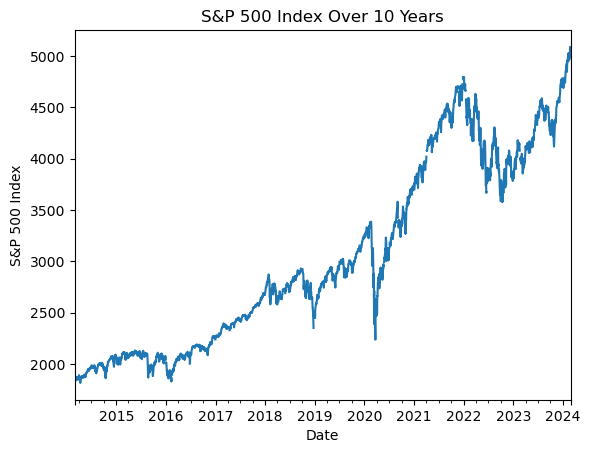

In [67]:
# Plot the index
data.SP500.plot(y='SP500', title='S&P 500 Index Over 10 Years', xlabel = 'Date', ylabel='S&P 500 Index')

<Axes: title={'center': 'S&P 500 Daily Returns Over 10 Years'}, xlabel='Date', ylabel='Daily Returns (%)'>

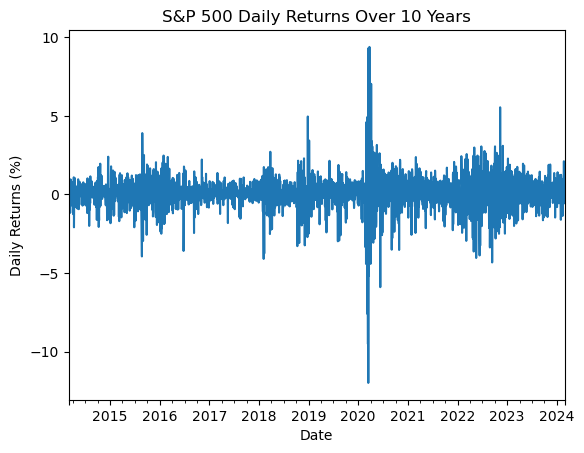

In [65]:
# Plot the daily return of the index 
# Daily Return =  [Current Day’s Value−Previous Day’s Value / Previous Day’s Value] × 100

data.SP500_returns.plot(title='S&P 500 Daily Returns Over 10 Years', xlabel = 'Date', ylabel='Daily Returns (%)')

### (b) Plot the autocorrelation and partial autocorrelation functions for the index and the return variable.

In [77]:
# The tsaplots module in statsmodels.graphics is used for time series analysis and specifically provides functions to 
# plot "autocorrelation" and "partial autocorrelation" functions.

import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt

Text(0.5, 1.0, 'Autocorrelation Function (ACF) - SP500 Returns')

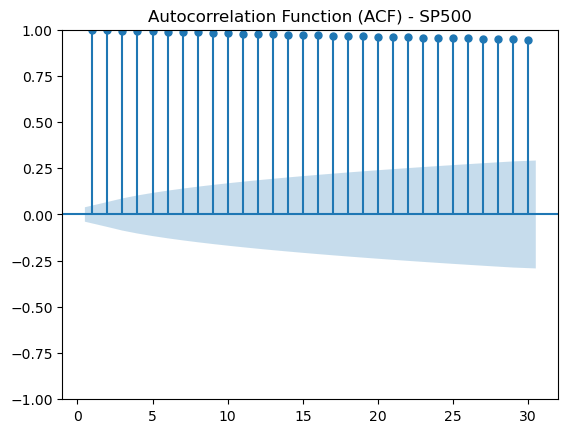

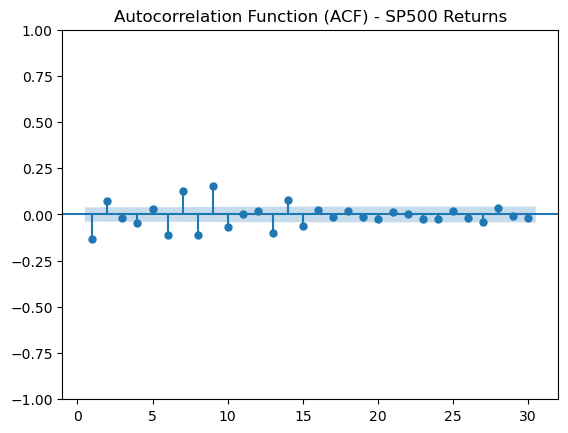

In [88]:
# Plot the Autocorrelation Function (ACF) for the 'SP500' column
# The zero=False parameter removes the autocorrelation at lag 0, and lags=30 specifies the number of lags to display.
# The [1:] indexing is used to exclude the first element (NaN) from the returns column since the percentage change operation introduces a NaN for the first value.

sgt.plot_acf(data.SP500.dropna(), zero=False, lags=30) 
plt.title("Autocorrelation Function (ACF) - SP500")

# Plot the ACF for the 'SP500_returns' column (returns)
sgt.plot_acf(data.SP500_returns[1:].dropna(), zero=False, lags=30)
plt.title("Autocorrelation Function (ACF) - SP500 Returns")

Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF) - SP500 Returns')

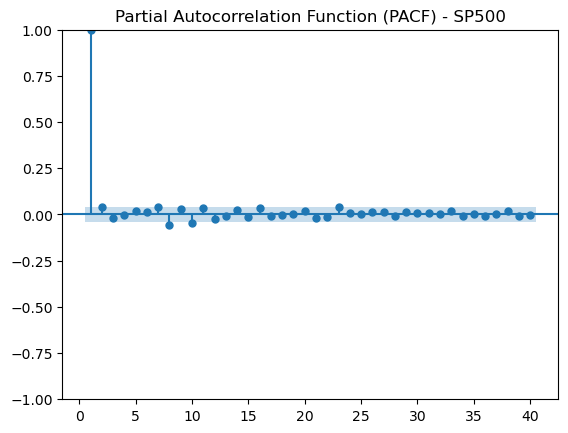

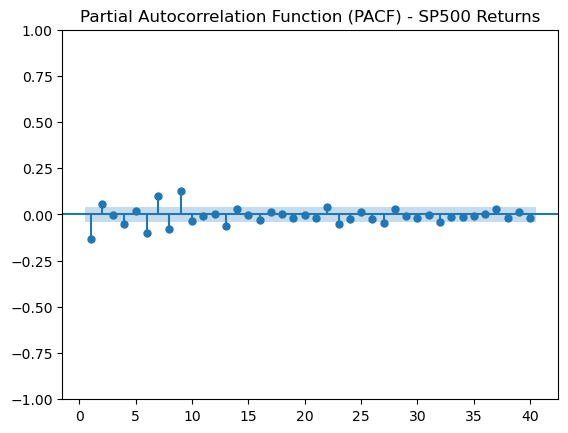

In [89]:
# Plot the Partial Autocorrelation Function (PACF) for 'SP500'
sgt.plot_pacf(data.SP500.dropna(), zero=False, lags=40)
plt.title("Partial Autocorrelation Function (PACF) - SP500")

# Plot the PACF for 'SP500_returns' (Returns) - drop missing values to get better results
sgt.plot_pacf(data.SP500_returns[1:].dropna(), zero=False, lags=40)
plt.title("Partial Autocorrelation Function (PACF) - SP500 Returns")


### (c) Estimate an AR(1) model using the S&P 500 index. Also, estimate an AR(1) model using the S&P 500 returns. Compare the goodness-of-fit for these two models by comparing the log likelihoods for the two estimated models. Based on this result, are we better off to model the S&P 500 index or its returns? Why?

### AR(1)
Estimate an ARIMA (AutoRegressive Integrated Moving Average) model for the S&P 500 index. The parameters (1,0,0) indicate an autoregressive (AR) component of order 1 and no differencing (d=0) or moving average (MA) component. 

In [99]:
model_SP500_ar_1 = ARIMA(data.SP500.dropna(), order=(1,0,0))

# This line fits the ARIMA model to the S&P 500 index using the historical data.
results_SP500_ar_1 = model_SP500_ar_1.fit()

# Show results
results_SP500_ar_1.summary()

/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  SP500   No. Observations:                 2516
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -12538.658
Date:                Thu, 29 Feb 2024   AIC                          25083.317
Time:                        04:17:52   BIC                          25100.808
Sample:                             0   HQIC                         25089.665
                               - 2516                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3054.8699   6298.049      0.485      0.628   -9289.080    1.54e+04
ar.L1          0.9999      0.001   1639.358      0.000       0.999       1.001
sigma2      1244.1960     15.182     81.954      0.000    1214.440    1273.952
===================================================================================
Ljung-Box (L1) (Q):                  22.10   Jarque-Bera (JB):              8768.29
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               7.62   Skew:                            -0.65
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [100]:
# Estimate an ARIMA (AutoRegressive Integrated Moving Average) model for the S&P 500 returns
model_SP500_results_ar_1 = ARIMA(data.SP500_returns[1:].dropna(), order=(1,0,0))
results_SP500_results_ar_1 = model_SP500_results_ar_1.fit()
results_SP500_results_ar_1.summary()

/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          SP500_returns   No. Observations:                 2607
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3915.611
Date:                Thu, 29 Feb 2024   AIC                           7837.221
Time:                        04:20:34   BIC                           7854.819
Sample:                    03-04-2014   HQIC                          7843.597
                         - 02-28-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0447      0.019      2.316      0.021       0.007       0.083
ar.L1         -0.1350      0.007    -18.331      0.000      -0.149      -0.121
sigma2         1.1806      0.013     91.767      0.000       1.155       1.206
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):             19335.74
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               1.83   Skew:                            -0.67
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Observation: 
The Log Likelihood of the SP500 Index is -12538.658 and the Log Likelihood  of the SP500 Returns is -3,904.041. The SP500 Returns has a lower negative Log Likelihood than SP500 index model. This is because the lower the negative Log Likelihood the better the fit.

### (d) Find the AR(p) model that fits the S&P 500 returns well. [Hint: follow the 5-step algorithm for model selection] 

# AR(2)
Create an ARIMA (AutoRegressive Integrated Moving Average) model for the Returns variable. The parameters (2,0,0) indicate an autoregressive (AR) component of order 2 and no differencing (d=0) or moving average (MA) component. data.Returns[1:] is used to exclude the first element (presumably to handle any NaN values).

In [127]:
# Fit ARIMA(2,0,0) model to Returns
model_SP500_results_ar_2 = ARIMA(data.SP500_returns[1:].dropna(), order=(2,0,0))
results_SP500_results_ar_2 = model_SP500_results_ar_2.fit()
results_SP500_results_ar_2.summary()

/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          SP500_returns   No. Observations:                 2607
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -3911.604
Date:                Thu, 29 Feb 2024   AIC                           7831.207
Time:                        05:12:32   BIC                           7854.671
Sample:                    03-04-2014   HQIC                          7839.707
                         - 02-28-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0448      0.021      2.124      0.034       0.003       0.086
ar.L1         -0.1276      0.008    -15.817      0.000      -0.143      -0.112
ar.L2          0.0554      0.008      7.371      0.000       0.041       0.070
sigma2         1.1770      0.013     92.223      0.000       1.152       1.202
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             18807.85
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.82   Skew:                            -0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [108]:
from scipy.stats.distributions import chi2

In [110]:
# Define a function LLR_test (Log Likelihood Ratio Test) to compare the fit of two nested models

def LLR_test(model1, model2, DF=1):
    # Step 1: Fit the two models and obtain their log likelihoods
    L1 = model1.fit().llf
    L2 = model2.fit().llf
    
    # Step 2: Calculate the likelihood ratio test statistic
    LR = -2 * (L1 - L2)
    
    # Step 3: Calculate the p-value using the chi-squared distribution
    p = chi2.sf(LR, DF).round(3)
    
    # Step 4: Return the p-value
    return p


In [112]:
# Compare AR(1) and AR(2)
LLR_test(model_SP500_results_ar_1, model_SP500_results_ar_2)

0.005

### Observation: 
The p-value = 0.005 implying means "model_SP500_results_ar_2", the AR(2) is an improvement from AR(1)

In [126]:
# AR(3)
model_SP500_results_ar_3 = ARIMA(data.SP500_returns[1:].dropna(), order=(3,0,0))
results_SP500_results_ar_3 = model_SP500_results_ar_3.fit()
results_SP500_results_ar_3.summary()

# Compare AR(2) and AR(3)
LLR_test(model_SP500_results_ar_2, model_SP500_results_ar_3)

/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


0.836

### Observation: 
The p-value = 0.836 implying means "model_SP500_results_ar_3", the AR(3) is not an improvement from AR(2) since we fail to reject the null hypothesis that AR(2) is a better fit than AR(3)

### (e) Find the MA(q) model that fits the S&P 500 returns well. 

In [141]:
data.res_returns_ar[1:].dropna().mean()
data.res_returns_ar[1:].dropna().std()

1.0851079633935363

#### Testing Stationarity of residuals

The null hypothesis of the Augmented Dickey-Fuller is **non-stationarity**. So, if p-value < critical value => the time series is stationary.

In [129]:
# Fit the ARIMA model
model_SP500_results_ar_2_fit = model_SP500_results_ar_2.fit()

# Analyse the residuals of the best fit model, AR(2)
data['res_returns_ar'] = model_SP500_results_ar_2_fit.resid

# Perform Augmented Dickey-Fuller test on the residuals
adf_test_result = sts.adfuller(data.res_returns_ar[1:])

# Display the ADF test results
adf_test_result




(-13.795037983244638,
 8.781709929256221e-26,
 13,
 2593,
 {'1%': -3.432874406246315,
  '5%': -2.8626552868541433,
  '10%': -2.5673637074050117},
 7643.505789923092)

Text(0.5, 1.0, 'Auto Correlation Function of Residuals for SP500 Returns (AR model)')

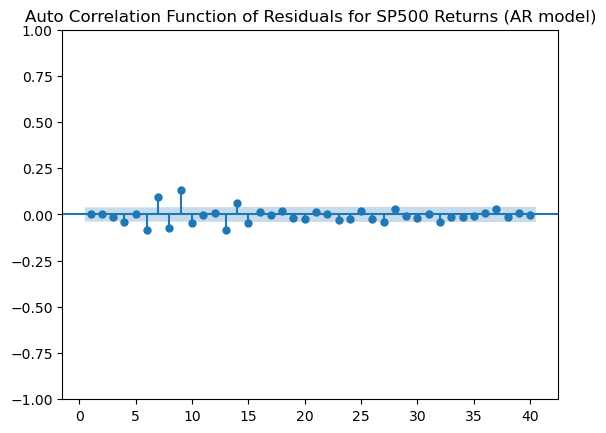

In [142]:
#### Checking Auto Correlation Function of residuals
sgt.plot_acf(data.res_returns_ar[1:].dropna(), zero=False, lags=40)
plt.title("Auto Correlation Function of Residuals for SP500 Returns (AR model)")

<Axes: xlabel='DATE'>

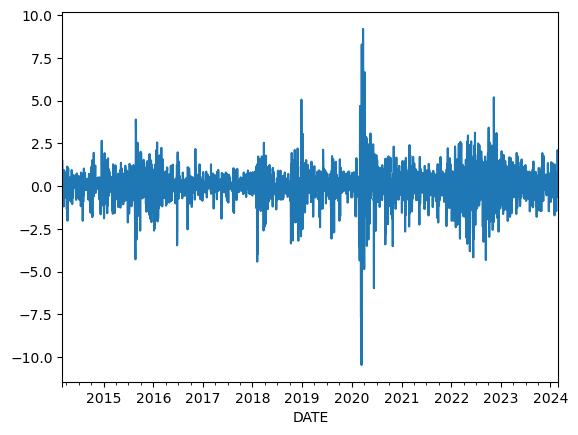

In [143]:
data.res_returns_ar[1:].dropna().plot()

In [131]:
# AR(4)
model_SP500_results_ar_4 = ARIMA(data.SP500_returns[1:].dropna(), order=(4,0,0))
results_SP500_results_ar_4 = model_SP500_results_ar_4.fit()
results_SP500_results_ar_4.summary()

/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          SP500_returns   No. Observations:                 2607
Model:                 ARIMA(4, 0, 0)   Log Likelihood               -3907.982
Date:                Thu, 29 Feb 2024   AIC                           7827.964
Time:                        05:14:01   BIC                           7863.160
Sample:                    03-04-2014   HQIC                          7840.715
                         - 02-28-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0448      0.021      2.147      0.032       0.004       0.086
ar.L1         -0.1276      0.009    -14.565      0.000      -0.145      -0.110
ar.L2          0.0578      0.008      7.115      0.000       0.042       0.074
ar.L3         -0.0107      0.009     -1.177      0.239      -0.029       0.007
ar.L4         -0.0525      0.009     -5.574      0.000      -0.071      -0.034
sigma2         1.1737      0.014     86.299      0.000       1.147       1.200
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             17762.71
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.83   Skew:                            -0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [133]:
# Compare AR(2) and AR(4)
LLR_test(model_SP500_results_ar_2, model_SP500_results_ar_4)

0.007

In [144]:
# AR(5)
model_SP500_results_ar_5 = ARIMA(data.SP500_returns[1:].dropna(), order=(5,0,0))
results_SP500_results_ar_5 = model_SP500_results_ar_5.fit()
results_SP500_results_ar_5.summary()

# Compare AR(4) and AR(5)
LLR_test(model_SP500_results_ar_4, model_SP500_results_ar_5)

/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


0.345

### MA(q) Models

The starting point for Moving Average models are the Autocorrelation Function.

In [151]:
# MA(1)
model_SP500_results_ma_1 = ARIMA(data.SP500_returns[1:].dropna(), order=(0,0,1))
results_SP500_results_ma_1 = model_SP500_results_ma_1.fit()
results_SP500_results_ma_1.summary()

/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          SP500_returns   No. Observations:                 2607
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -3918.257
Date:                Thu, 29 Feb 2024   AIC                           7842.514
Time:                        05:58:24   BIC                           7860.112
Sample:                    03-04-2014   HQIC                          7848.889
                         - 02-28-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0447      0.020      2.286      0.022       0.006       0.083
ma.L1         -0.1207      0.008    -15.184      0.000      -0.136      -0.105
sigma2         1.1830      0.013     92.625      0.000       1.158       1.208
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):             20318.56
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               1.83   Skew:                            -0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [153]:
# MA(2)
model_SP500_results_ma_2 = ARIMA(data.SP500_returns[1:].dropna(), order=(0,0,2))
results_SP500_results_ma_2 = model_SP500_results_ma_2.fit()
results_SP500_results_ma_2.summary()

/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          SP500_returns   No. Observations:                 2607
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -3911.923
Date:                Thu, 29 Feb 2024   AIC                           7831.846
Time:                        05:59:10   BIC                           7855.310
Sample:                    03-04-2014   HQIC                          7840.346
                         - 02-28-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0448      0.021      2.095      0.036       0.003       0.087
ma.L1         -0.1245      0.008    -15.250      0.000      -0.141      -0.109
ma.L2          0.0722      0.007      9.816      0.000       0.058       0.087
sigma2         1.1773      0.013     90.783      0.000       1.152       1.203
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             18279.74
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.83   Skew:                            -0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [170]:
# Compare models 
LLR_test(model_SP500_results_ma_1, model_SP500_results_ma_2, DF=1)

0.0

In [202]:

model_SP500_results_ma_20 = ARIMA(data.SP500_returns[1:].dropna(), order=(0,0,20))
results_SP500_results_ma_20 = model_SP500_results_ma_20.fit()
results_SP500_results_ma_20.summary()

/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          SP500_returns   No. Observations:                 2607
Model:                ARIMA(0, 0, 20)   Log Likelihood               -3837.452
Date:                Thu, 29 Feb 2024   AIC                           7718.904
Time:                        06:54:28   BIC                           7847.955
Sample:                    03-04-2014   HQIC                          7765.656
                         - 02-28-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0446      0.020      2.228      0.026       0.005       0.084
ma.L1         -0.0883      0.011     -8.188      0.000      -0.109      -0.067
ma.L2          0.0412      0.011      3.682      0.000       0.019       0.063
ma.L3         -0.0090      0.011     -0.800      0.424      -0.031       0.013
ma.L4         -0.0391      0.012     -3.235      0.001      -0.063      -0.015
ma.L5          0.0035      0.012      0.286      0.775      -0.020       0.027
ma.L6         -0.0788      0.012     -6.451      0.000      -0.103      -0.055
ma.L7          0.0921      0.013      7.214      0.000       0.067       0.117
ma.L8         -0.0872      0.012     -7.364      0.000      -0.110      -0.064
ma.L9          0.1473      0.013     11.600      0.000       0.122       0.172
ma.L10        -0.0648      0.014     -4.754      0.000      -0.091      -0.038
ma.L11        -0.0074      0.015     -0.502      0.616      -0.036       0.021
ma.L12         0.0157      0.014      1.120      0.263      -0.012       0.043
ma.L13        -0.1020      0.015     -6.714      0.000      -0.132      -0.072
ma.L14         0.0696      0.014      4.890      0.000       0.042       0.097
ma.L15        -0.0504      0.015     -3.320      0.001      -0.080      -0.021
ma.L16         0.0096      0.016      0.609      0.543      -0.021       0.040
ma.L17        -0.0072      0.015     -0.481      0.630      -0.036       0.022
ma.L18         0.0289      0.016      1.852      0.064      -0.002       0.059
ma.L19        -0.0447      0.016     -2.840      0.005      -0.076      -0.014
ma.L20        -0.0106      0.015     -0.717      0.474      -0.040       0.018
sigma2         1.1117      0.016     68.497      0.000       1.080       1.143
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10712.35
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.77   Skew:                            -0.82
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [203]:
# Compare models 
LLR_test(model_SP500_results_ma_2, model_SP500_results_ma_20, DF=18)

0.0

#### The p-value is 0 implying we reject the null hypothesis and the new model, the more complex one, is an improvment.

In [219]:
# Fit the ARIMA model
model_SP500_results_ma_20 = ARIMA(data.SP500_returns[1:].dropna(), order=(0, 0, 20))
results_SP500_results_ma_20 = model_SP500_results_ma_20.fit()

# Access residuals from the results object
data['res_ma'] = results_SP500_results_ma_20.resid

# Perform ADF test on residuals
sts.adfuller(data.res_ma[1:])


/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


(-51.048655900911996,
 0.0,
 0,
 2606,
 {'1%': -3.43286180083873,
  '5%': -2.8626497201105283,
  '10%': -2.5673607436289947},
 7604.546886954307)

Text(0.5, 1.0, 'ACF of Residuals for SP Return (MA(20) model)')

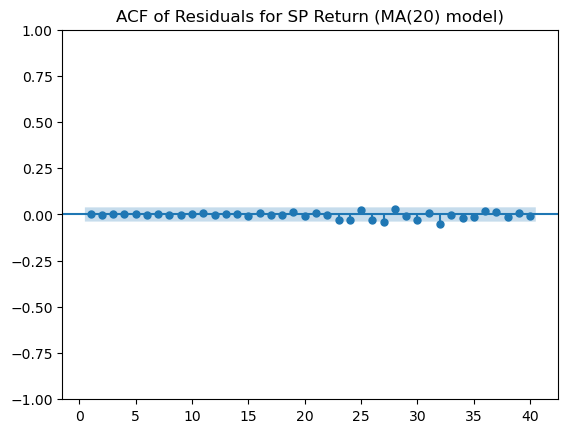

In [217]:
sgt.plot_acf(data.res_ma[1:], zero=False, lags=40)
plt.title("ACF of Residuals for SP Return (MA(20) model)")

<Axes: xlabel='DATE'>

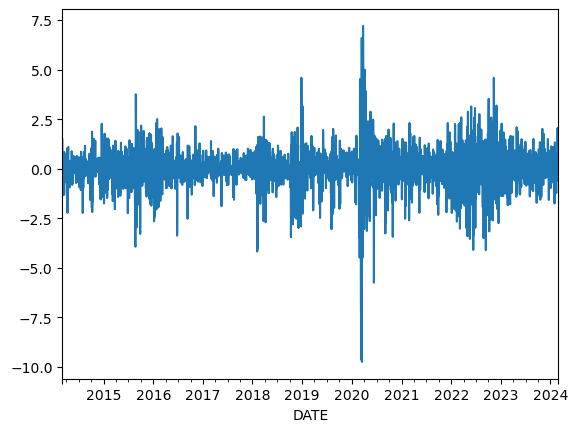

In [189]:
data.res_ma[1:].plot()

 ### (f) Find the ARMA(p,q) model that fits the S&P 500 returns well. [Hint: How should you adjust the model selection algorithm?]

In [192]:
model_SP500_results_arma_1_1 = ARIMA(data.SP500_returns[1:].dropna(), order=(1,0,1))
results_SP500_results_arma_1_1 = model_SP500_results_arma_1_1.fit()
results_SP500_results_arma_1_1.summary()

/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          SP500_returns   No. Observations:                 2607
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3912.557
Date:                Thu, 29 Feb 2024   AIC                           7833.114
Time:                        06:36:20   BIC                           7856.578
Sample:                    03-04-2014   HQIC                          7841.614
                         - 02-28-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0448      0.020      2.230      0.026       0.005       0.084
ar.L1         -0.3958      0.045     -8.851      0.000      -0.483      -0.308
ma.L1          0.2628      0.048      5.457      0.000       0.168       0.357
sigma2         1.1778      0.013     89.489      0.000       1.152       1.204
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):             19325.26
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               1.82   Skew:                            -0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [208]:
# ARMA(2,3)
model_SP500_results_arma_2_3 = ARIMA(data.SP500_returns[1:].dropna(), order=(2,0,3))
results_SP500_results_arma_2_3 = model_SP500_results_arma_2_3.fit()
results_SP500_results_arma_2_3.summary()


/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: Use

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          SP500_returns   No. Observations:                 2607
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -3906.415
Date:                Thu, 29 Feb 2024   AIC                           7826.831
Time:                        06:59:24   BIC                           7867.893
Sample:                    03-04-2014   HQIC                          7841.706
                         - 02-28-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0447      0.020      2.206      0.027       0.005       0.084
ar.L1          1.1454      0.049     23.205      0.000       1.049       1.242
ar.L2         -0.7499      0.056    -13.285      0.000      -0.861      -0.639
ma.L1         -1.2731      0.051    -24.775      0.000      -1.374      -1.172
ma.L2          0.9468      0.060     15.893      0.000       0.830       1.064
ma.L3         -0.1520      0.009    -16.576      0.000      -0.170      -0.134
sigma2         1.1723      0.013     88.066      0.000       1.146       1.198
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             19258.76
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.83   Skew:                            -0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [209]:

# Compare models
LLR_test(model_SP500_results_arma_1_1, model_SP500_results_arma_2_3, DF=3)

/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0.006

### Interpretation: The p-value is 0.006 which is implies the null hypothesis is overwhelmingly rejected and the more complex model is an improvement. 

In [210]:
# ARMA(3,5)
model_SP500_results_arma_3_5 = ARIMA(data.SP500_returns[1:].dropna(), order=(3,0,5))
results_SP500_results_arma_3_5 = model_SP500_results_arma_3_5.fit()
results_SP500_results_arma_3_5.summary()

/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          SP500_returns   No. Observations:                 2607
Model:                 ARIMA(3, 0, 5)   Log Likelihood               -3861.180
Date:                Thu, 29 Feb 2024   AIC                           7742.361
Time:                        07:00:58   BIC                           7801.020
Sample:                    03-04-2014   HQIC                          7763.611
                         - 02-28-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0434      0.015      2.810      0.005       0.013       0.074
ar.L1         -0.7273      0.030    -24.634      0.000      -0.785      -0.669
ar.L2          0.8052      0.026     30.861      0.000       0.754       0.856
ar.L3          0.8200      0.023     35.642      0.000       0.775       0.865
ma.L1          0.6338      0.032     19.756      0.000       0.571       0.697
ma.L2         -0.8380      0.030    -27.578      0.000      -0.898      -0.778
ma.L3         -0.7534      0.021    -35.838      0.000      -0.795      -0.712
ma.L4         -0.0117      0.015     -0.799      0.424      -0.041       0.017
ma.L5          0.0294      0.013      2.192      0.028       0.003       0.056
sigma2         1.1330      0.015     73.799      0.000       1.103       1.163
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11441.95
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.78   Skew:                            -0.88
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [211]:
# Fit the ARIMA model
model_SP500_results_arma_3_5 = ARIMA(data.SP500_returns[1:].dropna(), order=(3,0,5))
results_SP500_results_arma_3_5 = model_SP500_results_arma_3_5.fit()

# Access residuals from the results object
data['res_arma'] = results_SP500_results_arma_3_5.resid

# Perform ADF test on residuals
sts.adfuller(data.res_arma[1:])

/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(-13.14492392160162,
 1.404647264798813e-24,
 13,
 2593,
 {'1%': -3.432874406246315,
  '5%': -2.8626552868541433,
  '10%': -2.5673637074050117},
 7639.69494741596)

In [206]:
# ARMA(2,3)
model_SP500_results_arma_3_5 = ARIMA(data.SP500_returns[1:].dropna(), order=(3,0,5))
results_SP500_results_arma_3_5 = model_SP500_results_arma_3_5.fit()
results_SP500_results_arma_3_5.summary()

/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          SP500_returns   No. Observations:                 2607
Model:                 ARIMA(3, 0, 5)   Log Likelihood               -3861.180
Date:                Thu, 29 Feb 2024   AIC                           7742.361
Time:                        06:56:37   BIC                           7801.020
Sample:                    03-04-2014   HQIC                          7763.611
                         - 02-28-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0434      0.015      2.810      0.005       0.013       0.074
ar.L1         -0.7273      0.030    -24.634      0.000      -0.785      -0.669
ar.L2          0.8052      0.026     30.861      0.000       0.754       0.856
ar.L3          0.8200      0.023     35.642      0.000       0.775       0.865
ma.L1          0.6338      0.032     19.756      0.000       0.571       0.697
ma.L2         -0.8380      0.030    -27.578      0.000      -0.898      -0.778
ma.L3         -0.7534      0.021    -35.838      0.000      -0.795      -0.712
ma.L4         -0.0117      0.015     -0.799      0.424      -0.041       0.017
ma.L5          0.0294      0.013      2.192      0.028       0.003       0.056
sigma2         1.1330      0.015     73.799      0.000       1.103       1.163
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11441.95
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.78   Skew:                            -0.88
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 1.0, 'ACF of Residuals for SP Returns (ARMA(3,5) model)')

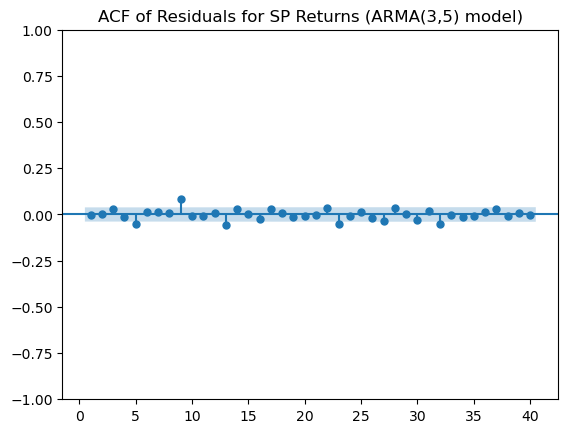

In [218]:

sgt.plot_acf(data.res_arma[1:], zero=False, lags=40)
plt.title("ACF of Residuals for SP Returns (ARMA(3,5) model)")

<Axes: xlabel='DATE'>

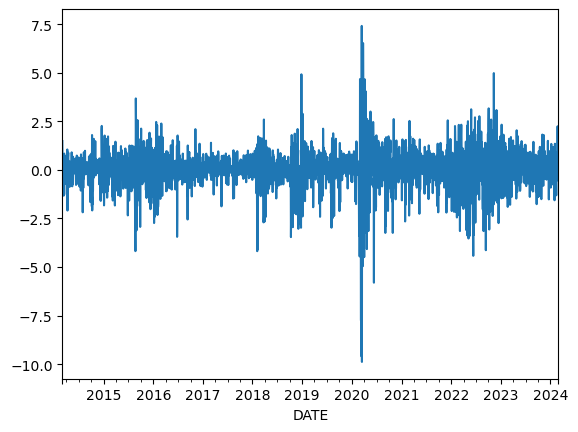

In [216]:
data.res_arma[1:].plot()

### (g) Which of the three models from parts d, e, f performs best? [Hint: Use the Log Likelihood Ratio test (for nested models) and the information criteria (for non- nested models) to compare the goodness-of-fit]

### The model from part (e), MA(20) model, does best. 

### (h)  Plot the residuals for the best model you found in the previous part. Test whether the residuals represent a White Noise process by performing the Augmented Dicky- Fuller test and assessing the autocorrelation function.

Text(0.5, 1.0, 'ACF of Residuals for GDP Growth (MA(20) model)')

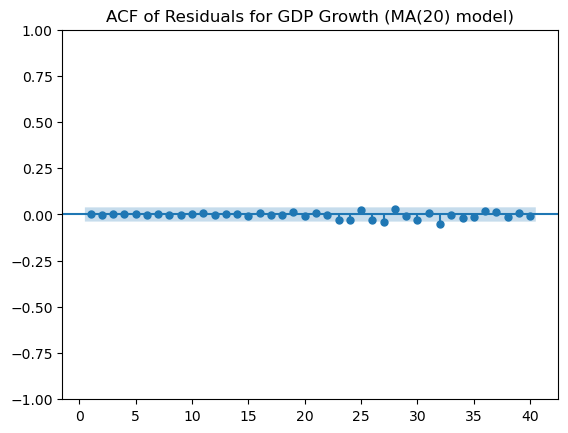

In [221]:
sgt.plot_acf(data.res_ma[1:], zero=False, lags=40)
plt.title("ACF of Residuals for GDP Growth (MA(20) model)")




<Axes: xlabel='DATE'>

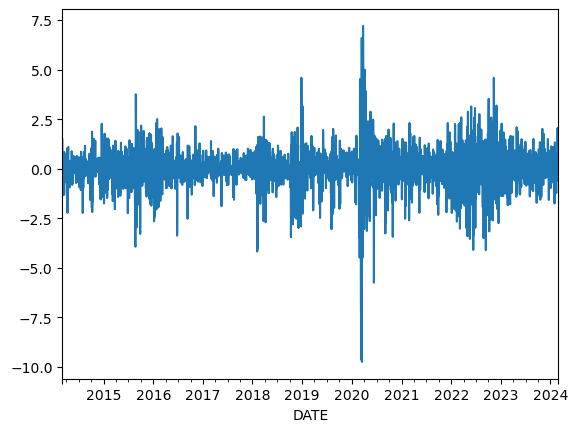

In [222]:
data.res_ma[1:].plot()

In [223]:
# Fit the ARIMA model
model_SP500_results_ma_20 = ARIMA(data.SP500_returns[1:].dropna(), order=(0, 0, 20))
results_SP500_results_ma_20 = model_SP500_results_ma_20.fit()

# Access residuals from the results object
data['res_ma'] = results_SP500_results_ma_20.resid

# Perform ADF test on residuals
sts.adfuller(data.res_ma[1:])

/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


(-51.048655900911996,
 0.0,
 0,
 2606,
 {'1%': -3.43286180083873,
  '5%': -2.8626497201105283,
  '10%': -2.5673607436289947},
 7604.546886954307)